In [1]:
import numpy as np

In [10]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [ ]:
import math 

In [16]:
import seaborn as sns

In [17]:
data = pd.read_csv('galaxy1.csv', sep = ',')

In [18]:
print  data

       GalaxyID         GroupID  SnapNum  Redshift  CentreOfMass_x  \
0      21379523  26000000000000       26   0.18271        5.927712   
1      21730537  26000000000003       26   0.18271       52.264893   
2      21242352  26000000000004       26   0.18271       10.774976   
3      21573588  26000000000002       26   0.18271        9.288896   
4      21109762  26000000000001       26   0.18271       18.618362   
5      21986363  26000000000006       26   0.18271       75.968440   
6      19701411  26000000000008       26   0.18271       84.766710   
7      20099627  26000000000009       26   0.18271       88.179460   
8      20163970  26000000000011       26   0.18271       54.217976   
9      18544430  26000000000000       26   0.18271        1.646505   
10     19634931  26000000000010       26   0.18271       72.937740   
11     18481116  26000000000001       26   0.18271       15.743982   
12     20867357  26000000000014       26   0.18271       36.935287   
13     20574263  260

In [110]:
SFR = data['StarFormationRate']
Staller_mass = data['MassType_Star']
#logmstar = np.log(Stallermass)
SSFR = SFR / Staller_mass
#SSFR = SFR/10**(logmstar)
#ssfr = math.log(SSFR)

In [122]:
SSFR != 0
print SSFR

[ 0.52273672 -0.03884134  1.33976263  1.81432804 -1.29812409 -0.52880915
  0.38920477 -0.77830635  0.60666905  0.55807449 -0.23228059 -0.24121119
 -0.52119142  0.51283155  1.48605583 -1.10179609  0.12486648  1.47179365
  1.00575386  0.12949892  0.5572201  -0.55623011  0.39298662 -0.91374032
 -0.71717746  0.10423    -1.80526294 -0.8974748  -0.630353   -1.11293562
 -1.17117704 -1.78979766  1.878192    1.12171333  1.90989694  0.83157168
  1.2317599   0.17136934  1.01446808  1.62602563  0.76804087  1.73026965
 -1.88850057  1.1583534  -1.91542602 -0.10797538  0.50526933 -0.13902225
 -0.11360553  0.6398682   0.14446125  2.13861596  1.52298309  1.28613166
 -1.6238938   0.80056593 -0.9405691  -0.16470333 -1.56949011 -2.1846426
  0.72059358 -0.0456352  -0.5019306   1.14706672 -0.43150022 -2.12955506
 -1.15952909  0.60992077 -0.42935563  2.41854767 -0.81628593 -1.14639088
  0.08782028  0.31163627 -1.05345084  0.1552387   0.62116638 -0.45882581
 -2.78034266  0.77526547 -1.57173411  1.86967057  0.

Text(0,0.5,u'y label name')

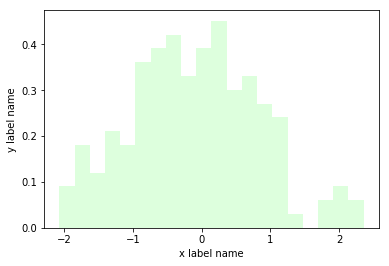

In [123]:
SSFR= np.random.randn(150)
plt.hist(SSFR, bins = 20, normed = True, color="#DDFFDD")
plt.xlabel("x label name")
plt.ylabel("y label name")